In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Numpy advantages:

* numpy arrays are statically typed. Their type is defined when the array is created. Therefore it's easy to use them with compiled languages like C.



In [33]:
# create 1D array (vector) from python list
# Vector variable names small letters.
a = np.array([1,2,3,4])

# create 2D array (matrix) from python list
# dims must be equal in rows and columns
# Matrix variable names Capital letters.
B = np.array([[1,2,3,4, 5], [4,5,6,8, 9]])
B.shape
B[0] # first row
type(B)
B.size # num elements
B.dtype # get the element data type
B.itemsize # bytes per element
B.nbytes # number of bytes for whole array
B.ndim #number of dimensions

2

In [20]:
# Create array with data type
M = np.array([[1,2],[3,4]], dtype=float)
M

array([[1., 2.],
       [3., 4.]])

Data Types in arrays:

* int, float, complex, bool, object
* int64, int16, float128, complex128

# Generating arrays

In [39]:
# create a range
x = np.arange(3,8,2) #start, excluding stop, step

# create a linear space
y = np.linspace(1, 2, 10) # start, inc stop, num samples =50
# help(np.linspace)

np.set_printoptions(precision=2, suppress=True)
print(y)

[1.   1.11 1.22 1.33 1.44 1.56 1.67 1.78 1.89 2.  ]


In [51]:
#help(np.logspace)
np.set_printoptions(precision=2, suppress=True)

z = np.logspace(0, 2, 10, base=10)
print(z)

[  1.     1.67   2.78   4.64   7.74  12.92  21.54  35.94  59.95 100.  ]


# Random Data

In [79]:
# uniform random numbers in [0,1]
np.random.rand(5,5)

# standard normal distributed random numbers
np.random.randn(5,5)


array([[ 0.67, -0.87, -1.19,  0.76, -0.75],
       [-1.  , -0.52, -1.19,  2.16,  0.18],
       [ 1.32, -0.41,  0.11, -0.57,  2.03],
       [-0.16,  0.17, -0.44, -0.65,  0.83],
       [-0.97,  0.42, -0.7 ,  0.24, -1.33]])

# Diagonal Matrix

In [83]:
# with shift (offset)
np.diag([1,2,4], k=-3)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0],
       [0, 0, 4, 0, 0, 0]])

In [92]:
a = np.zeros((4,4), int)
np.fill_diagonal(a, 1)
a

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

# CSV Data

In [172]:
data = np.genfromtxt('stockholm_td_adj.dat')
data.shape

(77431, 7)

In [176]:
np.mean(data[:,5])

5.785461895106611

In [180]:
np.mean(data[:,3]) # mean temperature

6.197109684751585

In [182]:
np.std(data[:,3])

8.282271621340573

In [187]:
a=(np.min(data[:,3]), np.max(data[:,3]))
a

(-25.8, 28.3)

In [190]:
months = np.unique(data[:,1])
months

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [197]:
# Only consider February

# create a boolean array where 2nd col equal to 2
feb_mask = data[:,1] == 2
np.mean(data[feb_mask,3])

-0.8321515520389532

Text(0, 0.5, 'Mean Temp')

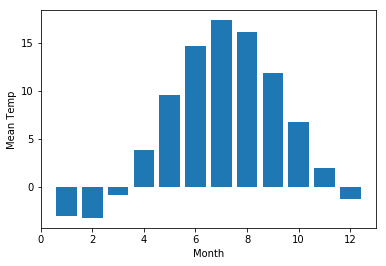

In [210]:
# Split by months
months = np.arange(1,13)

# data[:,1]==m --> bool array 
monthly_mean = [np.mean(data[data[:,1]==m, 3]) for m in months]

fig,ax=plt.subplots()
ax.bar(months, monthly_mean)
ax.set_xlabel('Month')
ax.set_ylabel('Mean Temp')



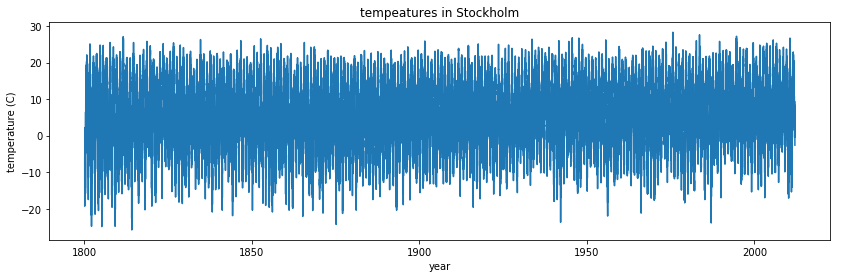

In [179]:
fig, ax = plt.subplots(figsize=(14,4))
# x is year + month/12 + day/365; y is value in 4th column
ax.plot(data[:,0]+data[:,1]/12.0+data[:,2]/365, data[:,3])
ax.axis('tight')
ax.set_title('tempeatures in Stockholm')
ax.set_xlabel('year')
ax.set_ylabel('temperature (C)');

In [26]:
M = np.random.rand(100, 100)
np.savetxt('random-matrix.csv', M)

In [ ]:
!more random-matrix.csv

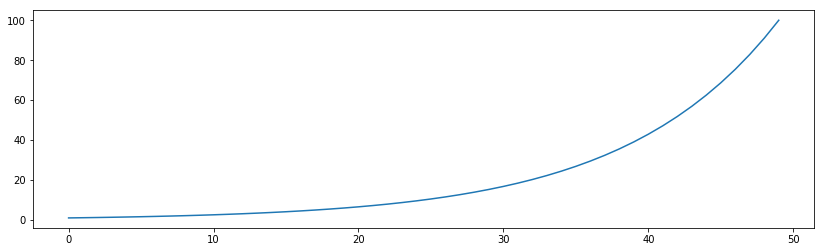

In [17]:
z = np.logspace(0, 2, base=10)

fig, ax = plt.subplots(figsize=(14,4))
ax.plot(range(50), z)


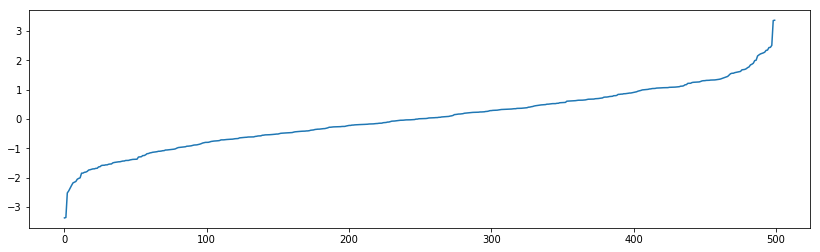

In [63]:
a = np.random.randn(500)
a.sort()

fig, ax = plt.subplots(figsize=(14,4))
ax.plot(range(500), a)


# Manipulating Arrays

In [75]:
M = np.random.randn(5,10)

# row, column
M[4, 9]

M[2,:] # Third row
M[:,0] # First column

# Assigning all zeros to first row
M[0,:] = 0
M


array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-9.19350577e-01,  3.84240304e-01, -2.04831330e-01,
        -1.67328415e+00, -4.53546468e-01,  6.37749783e-01,
         4.90731326e-01,  9.87467308e-01,  8.54396486e-01,
        -4.98168533e-01],
       [-1.08678145e+00, -3.63375804e-01, -1.03176888e+00,
        -1.69755481e-03,  1.22376670e+00, -1.64952905e+00,
         9.50507382e-01, -1.58719369e+00,  1.54544627e+00,
        -4.57594549e-01],
       [ 1.13912921e-01,  6.76106196e-01, -1.74104011e+00,
         8.67808675e-01,  1.96029151e-01, -1.47094244e-01,
         5.66958255e-01,  6.41795358e-01, -8.16218878e-02,
        -2.98714862e-01],
       [ 1.25610195e+00, -1.07065095e-01,  5.56296894e-01,
        -1.95073730e+00,  2.98373397e-01,  5.71674504e-01,
        -1.08302340e+00, -1.58600908e-01,  7.91653752e-01,
        -1.

## Index Slicing (no commas!)

In [108]:
a = np.array(range(100))

# from 40th pos to 50 position (excluding) every second value
a[40:50:2]

array([40, 42, 44, 46, 48])

In [138]:
M = np.array([[row+col*10 for row in range(5)] for col in range(7)])

# from the 2nd row to the 5th(exc) take the 1st to the 2nd(exc)
M[2:5, 1:2]

array([[21],
       [31],
       [41]])

In [140]:
M[2:5, 1:2] = 0
M

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20,  0, 22, 23, 24],
       [30,  0, 32, 33, 34],
       [40,  0, 42, 43, 44],
       [50, 51, 52, 53, 54],
       [60, 61, 62, 63, 64]])

## Fancy Indexing

Use an array as an index

In [171]:
N = np.array([[col+row for row in range(100)] for col in range(100)])

Rows = [44, 45, 50] # 45th row
Cols = [1,3, -1] # 1st, third, and last column
N[Rows, Cols] # returns (44,1), (45,3), (50,-1)


array([ 45,  48, 149])

## Higher Dimensional Data

In [ ]:
O = np.random.rand(3,3)
print(O)
np.max(O) # global max
np.max(O, axis=0) # max in each column
np.max(O, axis=1) # max in each column


# Resize, Reshape

In [230]:
P = np.random.rand(3,3)
n,m = P.shape

# make one row of matrix
Q = P.reshape(1, n*m)

#same as before
R = P.flatten()
R

array([0.07843433, 0.92721078, 0.5036616 , 0.66900199, 0.4968534 ,
       0.84214659, 0.54067963, 0.8376755 , 0.52574026])

## Adding new dim

In [233]:
v=np.array([1,2,3])

v[:,np.newaxis]

array([[1],
       [2],
       [3]])

## Stacking and Repeating arrays

In [245]:
S = np.zeros([5,5], dtype=int)
np.fill_diagonal(S,1)
np.tile(S,3)



array([[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]])

# Copy

In [ ]:
T = np.random.rand(10,10)

In [255]:
U = np.copy(T)
U[1,:] = 0

array([[0.50000965, 0.98430094, 0.56865895, 0.46226714, 0.77643267,
        0.43820644, 0.68189218, 0.36170848, 0.48254819, 0.286068  ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.17721971, 0.43151416, 0.04083936, 0.88406797, 0.06463789,
        0.57953219, 0.22404695, 0.58042772, 0.25132709, 0.00901087],
       [0.8800957 , 0.2104622 , 0.67381062, 0.21961843, 0.29425111,
        0.8470014 , 0.86572138, 0.50294299, 0.70476873, 0.27975995],
       [0.49211336, 0.5408978 , 0.17864237, 0.33686987, 0.69228335,
        0.43626575, 0.94534939, 0.63610406, 0.42333262, 0.39738623],
       [0.78492305, 0.90498492, 0.28795227, 0.27789728, 0.67623557,
        0.48142468, 0.25782809, 0.65300521, 0.32458223, 0.64989632],
       [0.22616749, 0.81665992, 0.77509423, 0.21233486, 0.31880247,
        0.47216618, 0.18147824, 0.35802217, 0.04181683, 0.33543524],
       [0.66053659, 0.98583209, 0.3614524